In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Download ground truth csv file

In [3]:
import pathlib
gt_dir=tf.keras.utils.get_file(origin='https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_GroundTruth.csv',fname='ISIC_2019_Training_GroundTruth.csv')

## Load data into memory

In [4]:
gt_df=pd.read_csv(gt_dir) #read meta data using path
gt_df.head(2)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
image_count=len(gt_df)
print('Number of images: ',image_count)
gt_df['UNK'].sum()

Number of images:  25331


0.0

In [6]:
#get class names
gt_columns=gt_df.columns
col=gt_columns.copy()
class_names={i:x for i,x in enumerate(col[1:])}

In [7]:
#return column index that contains 1
def get_imgclass(column_values):
    column=np.where(column_values==1.0)[0][0]
    return(column)

In [8]:
#convert values in columns to numpy array
img_gt_data=gt_df.iloc[:,1:].to_numpy()
img_int_label=np.apply_along_axis(get_imgclass,1,img_gt_data)
img_int_label[-1]

4

In [9]:
img_class_names=[class_names[i] for i in img_int_label]
img_class_names[-1]

'BKL'

In [10]:
gt_df['image_class']=img_class_names
gt_df['image_class']=gt_df['image_class'].astype('category')
gt_df.head(1)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_class
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV


## Visualize class inbalance

In [11]:
label=gt_df['image_class'].unique()
image_group=gt_df.groupby(['image_class'])['image'].count() #get number of image per class

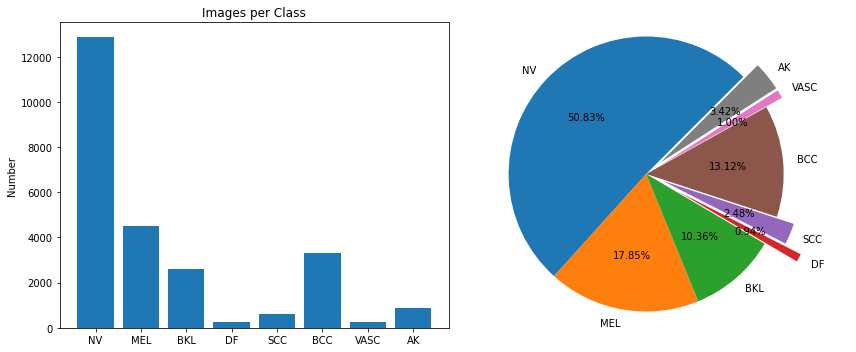

In [12]:
#plot
fig, (ax,ax1)=plt.subplots(1,2)
ax.bar(label,image_group[label])
ax.set_ylabel('Number')
ax.set_title('Images per Class')

ax1.pie(image_group[label],labels=label, radius=1.5,autopct='%0.2f%%',explode=[0,0,0,0.4,0.2,0,0.2,0.2],startangle=45)
ax1.axis('equal')

fig.set_size_inches(12,5)
fig.tight_layout()
plt.show()

In [13]:
print(label,image_group[label])

[NV, MEL, BKL, DF, SCC, BCC, VASC, AK]
Categories (8, object): [NV, MEL, BKL, DF, SCC, BCC, VASC, AK] image_class
NV      12875
MEL      4522
BKL      2624
DF        239
SCC       628
BCC      3323
VASC      253
AK        867
Name: image, dtype: int64


In [15]:
weights = image_group[label]/5
print(label,weights)

[NV, MEL, BKL, DF, SCC, BCC, VASC, AK]
Categories (8, object): [NV, MEL, BKL, DF, SCC, BCC, VASC, AK] image_class
NV      2575.0
MEL      904.4
BKL      524.8
DF        47.8
SCC      125.6
BCC      664.6
VASC      50.6
AK       173.4
Name: image, dtype: float64


## New CSV for ML Experimant

In [14]:
#gt_df.drop(['class_type'],axis=1)
#Set class type in ground truth data frame
gt_df.loc[gt_df['image_class'].isin(['MEL','BCC','SCC']),'class_type']=np.repeat("Malignant",len(gt_df.loc[gt_df['image_class'].isin(['MEL','BCC','SCC'])]))
gt_df.loc[gt_df['image_class'].isin(['NV']),'class_type']=np.repeat("Benign",len(gt_df.loc[gt_df['image_class'].isin(['NV'])]))
gt_df.loc[gt_df['image_class'].isin(['AK','BKL','DF','VASC','UNK']),'class_type']=np.repeat("Unknown",len(gt_df.loc[gt_df['image_class'].isin(['AK','BKL','DF','VASC','UNK'])]))

In [15]:
#Write to modified dataset to new csv file
gt_df.to_csv('.keras/datasets/ISIC_GT_With_Class_Type.csv',index=False,chunksize=1000)

## Modified metadata

In [16]:
modgt_df=pd.read_csv('.keras/datasets/ISIC_GT_With_Class_Type.csv')
modgt_df.head(2)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_class,class_type
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,Benign
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,Benign


In [17]:
label=modgt_df['class_type'].unique()
image_group=modgt_df.groupby(['class_type'])['image'].count() #get number of image per class

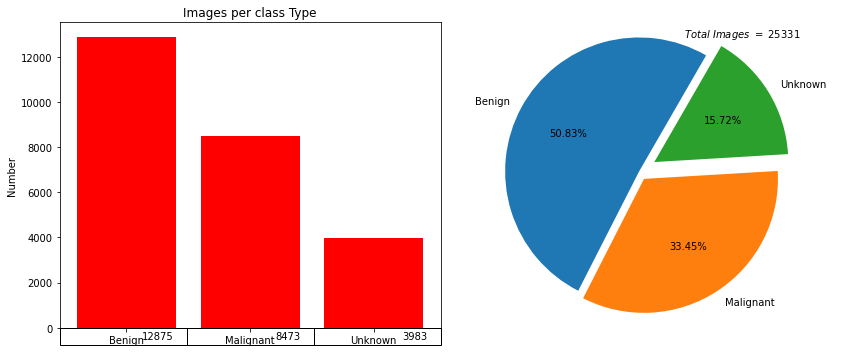

In [18]:
#plot
fig, (ax,ax1)=plt.subplots(1,2)

ax.bar(label,image_group[label],color='r')
ax.set_ylabel('Number')
ax.set_title('Images per class Type')
ax.table(cellText=[list(image_group)],loc='bottom')


ax1.pie(image_group[label],labels=label, radius=1.5,autopct='%0.2f%%',explode=[0,0.1,0.2],startangle=60)
ax1.axis('equal')
ax1.text(0.5, 1.5, r'$Total\ Images\ =\ 25331$')

fig.set_size_inches(12,5)
fig.tight_layout()
plt.show()